In [5]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.io as pio

from layout_pattern import color_palette_list

In [6]:
pio.renderers.default = 'jupyterlab'

In [7]:
df = pd.read_csv("../data/ml_project1_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
df.rename(columns=str.lower, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2240 non-null   int64  
 1   year_birth           2240 non-null   int64  
 2   education            2240 non-null   object 
 3   marital_status       2240 non-null   object 
 4   income               2216 non-null   float64
 5   kidhome              2240 non-null   int64  
 6   teenhome             2240 non-null   int64  
 7   dt_customer          2240 non-null   object 
 8   recency              2240 non-null   int64  
 9   mntwines             2240 non-null   int64  
 10  mntfruits            2240 non-null   int64  
 11  mntmeatproducts      2240 non-null   int64  
 12  mntfishproducts      2240 non-null   int64  
 13  mntsweetproducts     2240 non-null   int64  
 14  mntgoldprods         2240 non-null   int64  
 15  numdealspurchases    2240 non-null   i

# Qual a escolaridade dos clientes?

In [10]:
education = df.groupby(["education"]).size().reset_index(name="count")

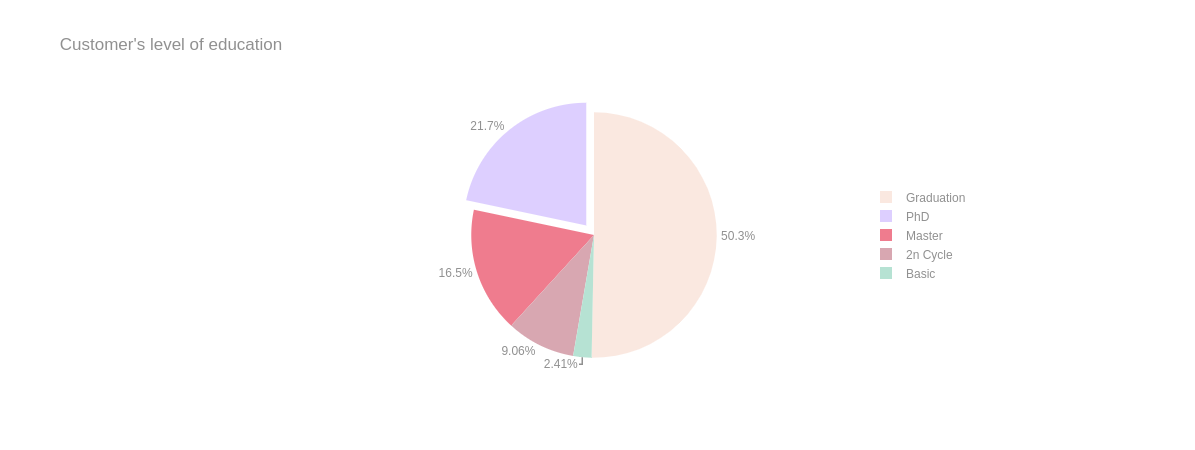

In [11]:
layout = go.Layout(title="Customer's level of education",
                   font=dict(family='Arial', size=12, color='#909090'),
                   legend=dict(x=0.9, y=0.5))

education_chart = go.Pie(labels=education["education"], 
               hoverinfo ='label+percent', 
               values = education["count"], 
               textposition ='outside',
               pull = [0, 0, 0, 0, 0.1],
               marker = dict(colors = color_palette_list))

data = [education_chart]
fig = go.Figure(data = data, layout = layout)
fig.show()

Há mais usuários com graduação na plataforma.

# Qual a relação entre escolaridade e quantidade de criança em casa?

In [12]:
education_wine = df.groupby(["education", "kidhome"])["kidhome"].count().reset_index(name="count")
education_wine.head(14)

,education,kidhome,count
0,2n Cycle,0,109
1,2n Cycle,1,91
2,2n Cycle,2,3
3,Basic,0,20
4,Basic,1,34
5,Graduation,0,650
6,Graduation,1,453
7,Graduation,2,24
8,Master,0,211
9,Master,1,150


# Qual a relação entre escolaridade e quantidade de adolescente em casa?

In [13]:
education_wine = df.groupby(["education", "teenhome"])["teenhome"].count().reset_index(name="count")
education_wine.head(14)

,education,teenhome,count
0,2n Cycle,0,121
1,2n Cycle,1,81
2,2n Cycle,2,1
3,Basic,0,49
4,Basic,1,5
5,Graduation,0,593
6,Graduation,1,511
7,Graduation,2,23
8,Master,0,181
9,Master,1,180


# Qual o tipo de produto mais pedido na plataforma?

In [14]:
mnt_products = df.agg({"mntwines": [sum], "mntfruits": [sum], "mntmeatproducts": [sum], "mntfishproducts": [sum], "mntsweetproducts": [sum], "mntgoldprods": [sum]})
mnt_products

,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods
sum,680816,58917,373968,84057,60621,98609


In [15]:
columns = mnt_products.columns.to_list()
values = [mnt_products[label]["sum"] for label in columns]
values.sort()
values

[58917, 60621, 84057, 98609, 373968, 680816]

In [16]:
labels = ["Fruits", "Sweet Products", "Fish Products", "Gold Products", "Eat Products", "Wine Products"]

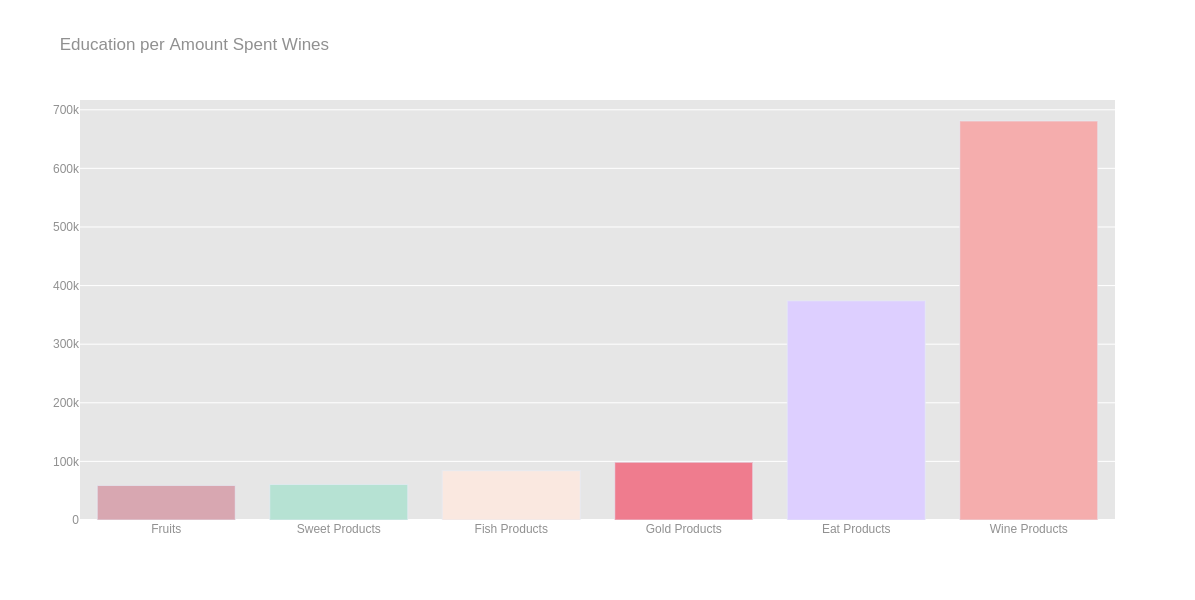

In [17]:
layout = go.Layout(title="Education per Amount Spent Wines",
                   font=dict(family='Arial', size=12, color='#909090'),
                   legend=dict(x=0.9, y=0.5), plot_bgcolor='rgb(230, 230,230)', width=600, height=600)

education_wine_chart = go.Bar(x = labels,
                              y = values,
                              marker=dict(color=color_palette_list))


data = [education_wine_chart]
fig = go.Figure(data=data, layout=layout)

fig.show()

# O consumo de vinho está alinhado à escolaridade?

O consumo de alcool é maior quem possui graduação pois há mais usuários desse grupo cadastrados no conjunto de dados.

In [18]:
education_wine = df.groupby(["education"], as_index=False).agg({"mntwines" : [sum]})
education_wine.columns = education_wine.columns.droplevel(level = 1)
education_wine.rename(columns = {"mntwines": "count_wine"}, inplace = True)
education_wine.sort_values("count_wine", ascending=True, inplace = True)

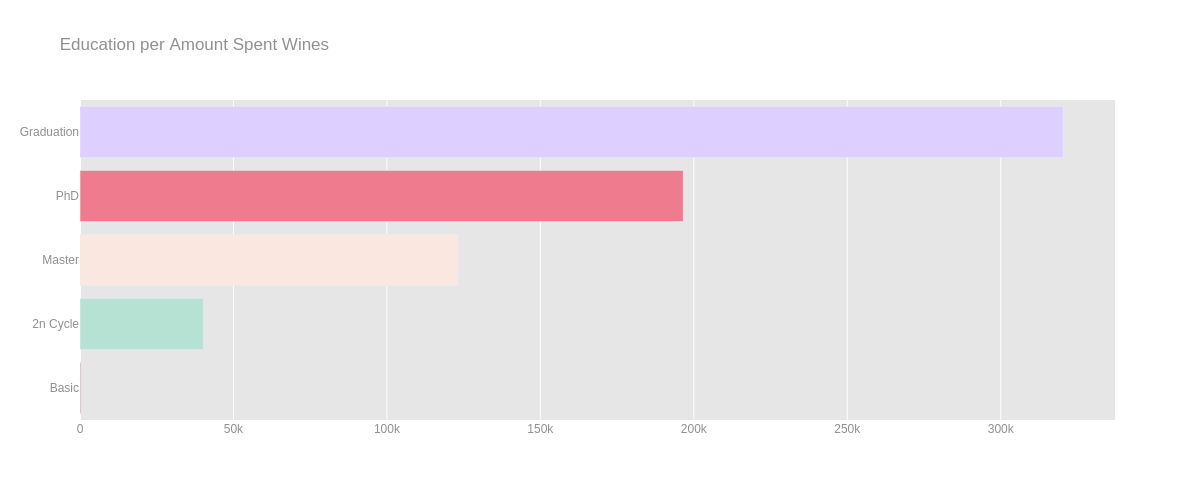

In [19]:
layout = go.Layout(title="Education per Amount Spent Wines",
                   font=dict(family='Arial', size=12, color='#909090'),
                   legend=dict(x=0.9, y=0.5), plot_bgcolor='rgb(230, 230,230)', width=700, height=500)

education_wine_chart = go.Bar(x = education_wine["count_wine"],
                              y = education_wine["education"],
                              orientation = 'h',
                              marker=dict(color=color_palette_list))


data = [education_wine_chart]
fig = go.Figure(data=data, layout=layout)

fig.show()